# k-Means Clustering

In [1]:
import numpy as np
import pandas as pd
from pylab import plt, mpl
plt.style.use('seaborn-v0_8')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'
np.set_printoptions(precision=4, suppress=True)

Scikit-learn provides a useful method, `make_blobs` which is useful for generating clustered sample data.

In [2]:
from sklearn.datasets import make_blobs
x, y = make_blobs(n_samples=100, centers=4, random_state=500, cluster_std=1.25)

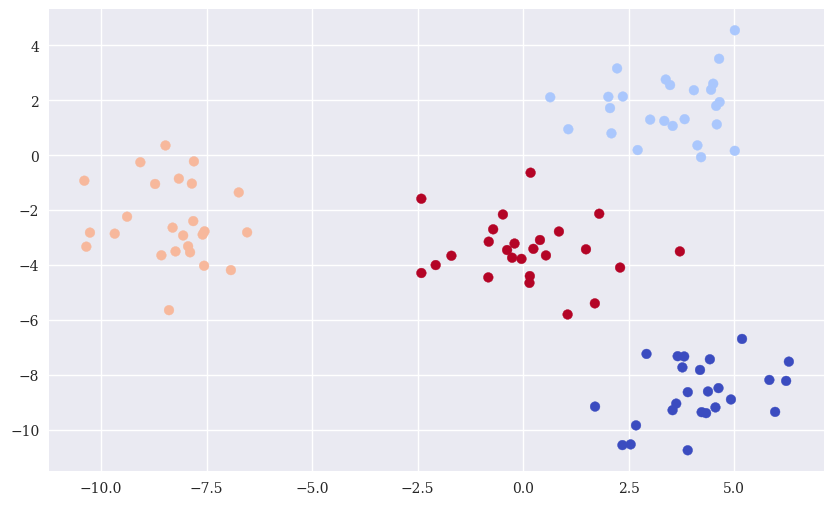

In [3]:
plt.figure(figsize=(10, 6))
plt.scatter(x[:, 0], x[:, 1], c=y, cmap='coolwarm')

Scikit-learn's `KMeans` class is a convenient way to implement a K-means Clustering model.

In [4]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=4, random_state=0)

In [5]:
model.fit(x)

KMeans(n_clusters=4, random_state=0)

In [6]:
# y_ represets the (predicted) cluster-label index
y_ = model.predict(x)
y_

array([1, 1, 0, 3, 0, 0, 1, 3, 0, 3, 3, 1, 3, 2, 2, 1, 3, 2, 3, 2, 2, 1,
       0, 3, 0, 0, 2, 2, 0, 1, 3, 0, 0, 2, 0, 1, 0, 1, 3, 3, 3, 0, 2, 2,
       1, 0, 3, 2, 3, 2, 1, 2, 0, 2, 0, 1, 0, 3, 2, 1, 0, 2, 1, 3, 1, 2,
       0, 0, 0, 3, 1, 0, 3, 2, 3, 1, 3, 2, 3, 3, 0, 1, 0, 1, 3, 3, 1, 3,
       2, 2, 2, 1, 1, 1, 1, 2, 1, 0, 2, 2], dtype=int32)

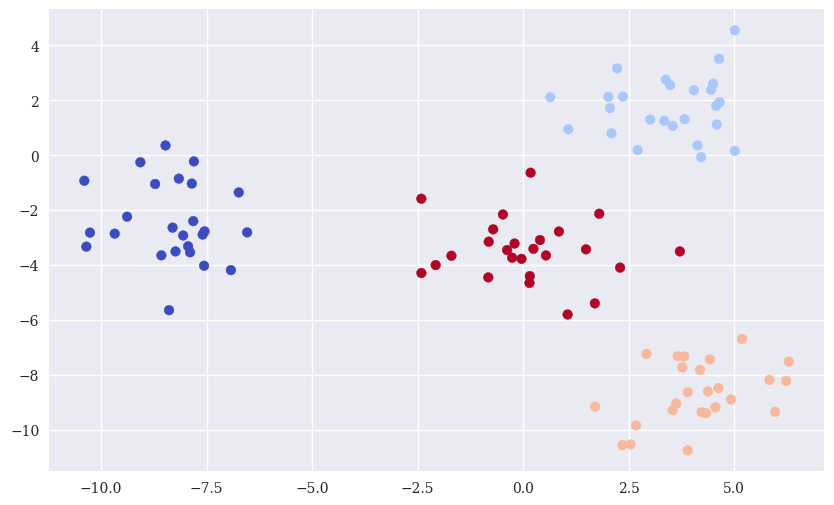

In [7]:
# The i'th axis is accessed using x[:,i]
plt.figure(figsize=(10, 6))
plt.scatter(x[:, 0], x[:, 1], c=y_, cmap='coolwarm')

# The Assumptions of k-Means Clustering, and how to Test Them

Assumption 1: Spherical Clusters
- K-means assumes that the clusters are spherical (or isotropic).
- This means that the clusters should be roughly circular in all directions.

Assumption 2: Equal Variance
- K-means assumes that each cluster has roughly equal variance.
- This means that the spread or scatter of points in each cluster should be similar.

Assumption 3: Similar Size
- K-means assumes that each cluster has a similar number of points.


## How to Test These Assumptions

### Test 1: Visual Inspection
- One simple way to test the assumptions is to visualize the data.
- If the clusters look roughly spherical and have similar sizes and variances, K-means is appropriate.

### Test 2: Silhouette Score
- The silhouette score is a measure of how similar each point is to its own cluster compared to other clusters.
- A higher silhouette score indicates that the clusters are well separated.


In [8]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(x, y_)
print(f'Silhouette Score: {sil_score:.4f}')



Silhouette Score: 0.6712


### Test 3: Elbow Method
- The elbow method helps to determine the optimal number of clusters by plotting the within-cluster sum of squares (WCSS) against the number of clusters.
- The "elbow" point (where the WCSS begins to level off) indicates the optimal number of clusters.

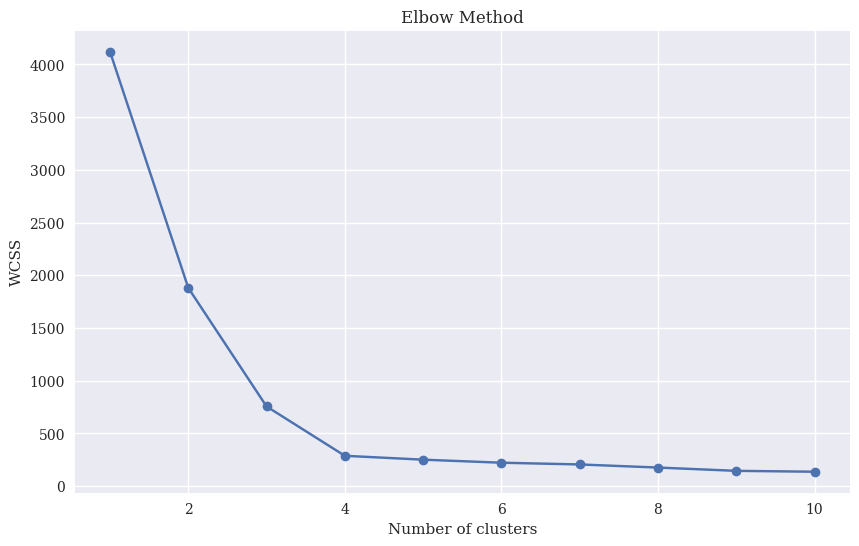

In [9]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()



### Test 4: Davies-Bouldin Index

The Davies-Bouldin Index measures the average similarity ratio of each cluster with respect to its most similar cluster. Lower Davies-Bouldin Index values indicate better clustering performance.

In [11]:
from sklearn.metrics import davies_bouldin_score

db_score = davies_bouldin_score(x, y_)
print(f'Davies-Bouldin Index: {db_score:.4f}')

Davies-Bouldin Index: 0.4435
